In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("maaslar.csv")
data

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [3]:
data.shape

(10, 3)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   unvan            10 non-null     object
 1   Egitim Seviyesi  10 non-null     int64 
 2   maas             10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
X=data.iloc[:,1].values.reshape(-1,1)
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [6]:
y=data.iloc[:,2].values.reshape(-1,1)
y

array([[ 2250],
       [ 2500],
       [ 3000],
       [ 4000],
       [ 5500],
       [ 7500],
       [10000],
       [15000],
       [25000],
       [50000]], dtype=int64)

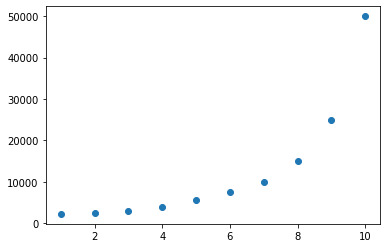

In [7]:
plt.scatter(X,y)

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(X)
sc1=StandardScaler()
y_sc=sc1.fit_transform(y)
y_sc

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [9]:
x_sc

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [10]:
#Import SVR library and use kernel=rbf
from sklearn.svm import SVR
sv=SVR(kernel='rbf')
sv.fit(x_sc,y_sc)
y_head=sv.predict(x_sc)
y_head

c:\users\sahil\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([-0.61985717, -0.629033  , -0.56735658, -0.49662252, -0.44630564,
       -0.36590427, -0.14129748,  0.28510258,  0.78163737,  1.08500645])

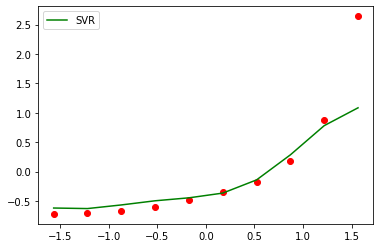

In [11]:
# Predict after using SVR
plt.plot(x_sc,y_head,color='green',label= "SVR")
plt.legend()
plt.scatter(x_sc,y_sc,color="red")
plt.show()

In [12]:
print(sv.score(x_sc,y_sc))

0.7513836788854973


In [13]:
x_sc=x_sc.flatten()
y_sc=y_sc.flatten()

In [14]:
# Compare the real and prediction value
predict_data=pd.DataFrame({"Actual":x_sc,"predict":y_sc})
predict_data

,Actual,predict
0,-1.566699,-0.720043
1,-1.218544,-0.702438
2,-0.870388,-0.667228
3,-0.522233,-0.596808
4,-0.174078,-0.491178
5,0.174078,-0.350339
6,0.522233,-0.174289
7,0.870388,0.177810
8,1.218544,0.882008
9,1.566699,2.642503
